# Twitter API ideas :
- why? "always listen to your customer" (what they REALLY saying. which is where they express themselves in twitter & reddit). see sentiment score of given topic & most used keyword. (to understand news on a particular topic fast OR one of feature for stock algo)
- have a frontend that input a query
- returns 2 things:
    1) sentiment score of that given keyword from both reddit AND twitter
    2) wordcount from both reddit AND twitter


- able to identify current trend of the market by listening directly to users on a certain topic sentiments ?

# Obtain
- SEMN steps do later
- codes to retrieve twitter [here](https://github.com/twitterdev/Twitter-API-v2-sample-code)

In [1]:
# reference : https://towardsdatascience.com/searching-for-tweets-with-python-f659144b225f

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import json
import requests
import os
from dotenv import load_dotenv

load_dotenv()


BEARER_TOKEN = os.getenv('TWITTER_BEARER_TOKEN')

#define search twitter function
def search_twitter(query, tweet_fields, bearer_token = BEARER_TOKEN):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}

    url = "https://api.twitter.com/2/tweets/search/recent?query={}&{}".format(
        query, tweet_fields
    )
    response = requests.request("GET", url, headers=headers)

    print(response.status_code)

    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [18]:
# from https://github.com/twitterdev/Twitter-API-v2-sample-code/blob/main/User-Tweet-Timeline/user_tweets.py

def create_url():
    # Replace with user ID below. get ID here https://tweeterid.com/
    user_id = 33458236
    return "https://api.twitter.com/2/users/{}/tweets".format(user_id)


def get_params():
    # Tweet fields are adjustable.
    # Options include:
    # attachments, author_id, context_annotations,
    # conversation_id, created_at, entities, geo, id,
    # in_reply_to_user_id, lang, non_public_metrics, organic_metrics,
    # possibly_sensitive, promoted_metrics, public_metrics, referenced_tweets,
    # source, text, and withheld
    return {"tweet.fields": "created_at"}


def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {BEARER_TOKEN}"
    r.headers["User-Agent"] = "v2UserTweetsPython"
    return r


def connect_to_endpoint(url, params):
    response = requests.request("GET", url, auth=bearer_oauth, params=params)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Request returned an error: {} {}".format(
                response.status_code, response.text
            )
        )
    return response.json()


def main():
    url = create_url()
    params = get_params()
    json_response = connect_to_endpoint(url, params)
    return json_response
    # print(json.dumps(json_response, indent=4, sort_keys=True))
    


In [24]:
# combine all tweets into one long sentence
tw = main()
i = 0
while i < len(tw.get('data')):
    if i == 0:
        comb_tweets = tw.get('data')[i]['text']
        i += 1
    else:
        comb_tweets = comb_tweets + ' ' + tw.get('data')[i]['text']
        i += 1

# Scrub
    - remove punctuations
    - remove stopwords

In [25]:
# list of punctuations u want to remove
punc = '''\n!()-[]{};:'"\, <>./?@#$%^&*_~\râ\x80\x9d\x9c\x99\x94'''

# remove punctuation by looping thru each character in the text, and replace punc with space ' '
for char in comb_tweets:
    if char in punc:
        comb_tweets = comb_tweets.replace(char, ' ')

# # set all to lowercase
# lowertext_tw = []

comb_tweets = comb_tweets.lower()


print(comb_tweets)

aces menyambut hari kemerdekaan indonesia  dapatkan beragam kebutuhan anda dengan diskon hingga 70  di ace online melalui aplikasi miss ace  jangan sampai kehabisan ya aces  cek promonya di https   t co wwylbntzuk 🙂  acesemangataktivitassetiaphari  bisabersamaace  merdeka https   t co cow1z8lxxw hai kak  rlsptr  untuk kris air purifier potrtable di rp 999 900  untuk pemesanan dapat melalui ace online kami  terima kasih akhir pekan waktunya aces beristirahat dan bersantai di rumah  tentunya jangan lupa untuk menggunakan produk yang membuat kamar anda lebih sehat dan bersih dari ace  🙂 acesemangataktivitassetiaphari  bisabersamaace  seprai  pengharumruangan  airpurifier  pengisapdebu https   t co 8z6gnxb6z6 hai kak  luxlukman  mohon maaf atas kendala yang terjadi  mohon dapat di informasikan untuk no whatsapp kakak melalui dm kami agar dapat kami tindaklanjuti ke team terkait  terima kasih aces merawat hewan peliharaan sangat penting untuk memperhatikan segala kebutuhannya  untuk itu ace

In [ ]:
# tokenize word (split whole sentence to each letter) by space ' '
tokens = lowertext_tw.split(' ')

# bring in pre-made list of stopwords
sw_url = 'https://raw.githubusercontent.com/dwihdyn/ds-exploration/main/p3/stopwords-nlp.txt'
response = requests.get(sw_url)
stopwords = response.text.splitlines()

# remove stopwords using loop
tokens = [t for t in tokens if t not in stopwords and len(t) > 0]

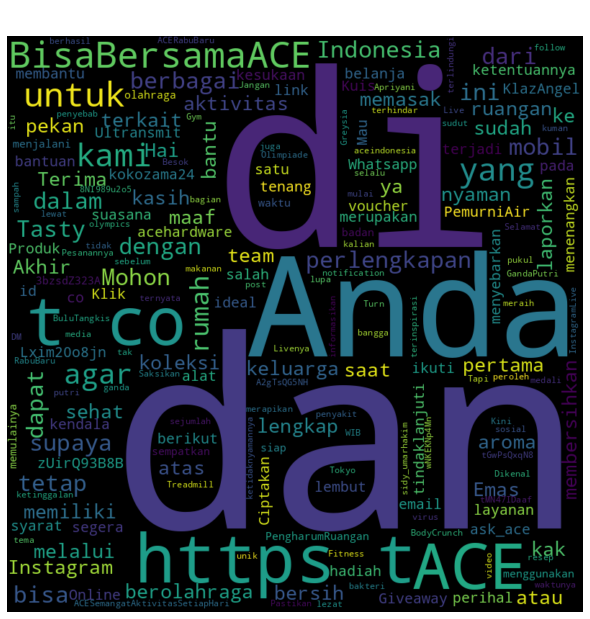

In [54]:
df = pd.DataFrame()

# append list to dataframe
df['ace tweets'] = tw_text

# wordcloud function

from wordcloud import WordCloud

# function to create wordcloud
def wordcloud_generator(data, title=None):
    ''' Input review/description/long text column from dataset, Output wordcloud '''

    # enter data into wordcloud & pre-set the size of plot
    wordcloud = WordCloud(
            width=800,
            height=800,
            background_color='black',
            min_font_size=10
        ).generate(" ".join(data.values))

    # set the plt 'canvas' and plot wordcloud on it
    plt.figure(figsize=(8,8), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title, fontsize=30)
    plt.show()  


wordcloud_generator(df['ace tweets'], title="Most used word in ace")  

In [2]:
#search term
query = "skateboarding dog"
#twitter fields to be returned by api call
tweet_fields = "tweet.fields=text,author_id,created_at"

#twitter api call
json_response = search_twitter(query=query, tweet_fields=tweet_fields, bearer_token=BEARER_TOKEN)
#pretty printing
print(json.dumps(json_response, indent=4, sort_keys=True))

200
{
    "data": [
        {
            "author_id": "1256654802597089282",
            "created_at": "2021-08-06T03:26:24.000Z",
            "id": "1423485582861348865",
            "text": "I MET THE SKATEBOARDING DOG https://t.co/QunznF2cmY"
        },
        {
            "author_id": "474909411",
            "created_at": "2021-08-06T01:02:38.000Z",
            "id": "1423449403671683075",
            "text": "Just in case anyone was keeping track at home, the Olympic skateboarding events were dog shit, and it was probably one of the worst organized events of the games. \n\nParis will come up big time on this one. \n\nCowabunga \ud83e\udd19\ud83c\udffb"
        },
        {
            "author_id": "1023410515",
            "created_at": "2021-08-05T22:25:42.000Z",
            "id": "1423409909643763716",
            "text": "RT @VippusaO: If you\u2019ve already seen a dog skateboarding in overalls today just keep on scrolling...\nvia RecChapman \nhttps://t.co/E8SkBW3pr\u2026"


# how to improve ?
- user type in product name, output all tweets about the products (issue is too 'noisy' as in, we search 'tupperware' on twitter, and will return jokes that uses the word tupperware & nothing on the tupperware product itself)